These steps are for extracting number of firms as they relate to customer type from the census' Annual Business Survey Characteristics of Business API

The data comes from https://www.census.gov/data/developers/data-sets/abs.2019.html

There are many variables available to choose from that are specified in the "get=" section of the url

For a full list of variables to build your own queries please visit the aforementioned website

There are also steps for transformations applied to these dataframes that return specific state (Wisconsin,Minnesota) data as well as nationwide data

Extraction Steps for specific state (Minnesota,Wisconsin) data:

1.Make sure you have the required imports for extraction: requests,json,pandas

2.Connect to the API using the url provided and the requests.request("GET",YOURURL) method: 
    url = https://api.census.gov/data/2018/abscb.html?get=NAME,QDESC,BUSCHAR,QDESC_LABEL,BUSCHAR_LABEL,FIRMPDEMP,FIRMPDEMP_F&for=state:*&QDESC=B14&key=YOURKEY
    
    *NOTE* Make sure to request a key and replace YOURKEY in the above url with the key you received *NOTE*

3.Load in the request response as a JSON using the json.loads(response.text) method

4.Save the first entry from the JSON as your labels, this sets up the columns in the dataframe

5.Save the remaining entries from the JSON as your rows, this sets up the data in the dataframe

6.Create the dataframe using the pandas.DataFrame(rows,columns=labels) method

In [6]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://api.census.gov/data/2018/abscb.html?get=NAME,QDESC,BUSCHAR,QDESC_LABEL,BUSCHAR_LABEL,FIRMPDEMP,FIRMPDEMP_F&for=state:*&QDESC=B14&key=1b20acce6b62709834dab0bc6006364236b68266"

response = requests.request("GET",url)

responseJSON = json.loads(response.text)

data_labels = responseJSON[0]

data_rows = responseJSON[1:]

df = pd.DataFrame(data_rows,columns=data_labels)

The next series of transformations will focus on returning the specific state (Minnesota,Wisconsin) data

Transformation steps for Minnesota Data:

1.Create a dataframe that returns only the data with "Minnesota" as the NAME

2.Change the FIRMDEMP data to be numeric data using the pandas.to_numeric(variable) method

    *NOTE* You may have to include the errors="coerce" parameter in order to make this work *NOTE*

*NOTE* These next steps are optional and just make for more consistent data and increase readability *NOTE*

3.Replace the label "State and local government, including school districts, transportation authorities, etc." with "State and local Government" using the replace("oldLabel","newLabel") method
    to increase readability

4.Replace the label "Other businesses, including distributors of your product(s)" with "Other Businesses" using the replace("oldLabel","newLabel") method to increase readability

5.Create a list of the labels in the order you want to display them if you were to graph them

6.Order the results by setting the index on the dataframe to "BUSCHAR_LABEL" using the set_index() method and then passing in your ordered list to the loc[] method

Included in the code block below are the steps used to generate a graph using the matplotlib package. If you wish to replicate these steps make sure you have imported
    matplotlib.pyplot and included the line %matplotlib inline underneath the import line

C:\Users\bggru\AppData\Local\Temp/ipykernel_31056/1132028554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minnesotadf["FIRMPDEMP"] = pd.to_numeric(minnesotadf["FIRMPDEMP"],errors="coerce")


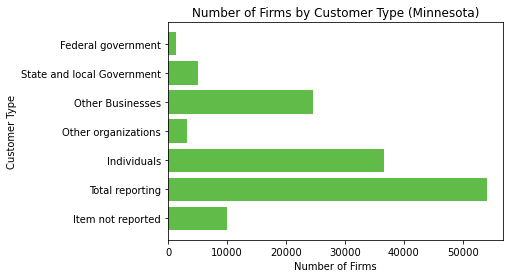

In [7]:
minnesotadf = df[df["NAME"] == "Minnesota"]
minnesotadf["FIRMPDEMP"] = pd.to_numeric(minnesotadf["FIRMPDEMP"],errors="coerce")
minnesotadf = minnesotadf.loc[(minnesotadf["BUSCHAR_LABEL"] != "All firms")]
minnesotadf = minnesotadf.replace("State and local government, including school districts, transportation authorities, etc.","State and local Government")
minnesotadf = minnesotadf.replace("Other businesses, including distributors of your product(s)","Other Businesses")

field="BUSCHAR_LABEL"
typeOrder=["Item not reported","Total reporting","Individuals","Other organizations","Other Businesses","State and local Government","Federal government"]
minnesotadf = minnesotadf.set_index(field).loc[typeOrder]

plt.barh(minnesotadf.index,minnesotadf["FIRMPDEMP"],color="#60BB48")
plt.title("Number of Firms by Customer Type (Minnesota)")
plt.xlabel("Number of Firms")
plt.ylabel("Customer Type")
plt.show()

Transformation steps for Wisconsin Data:

1.Create a dataframe that returns only the data with "Wisconsin" as the NAME

2.Change the FIRMDEMP data to be numeric data using the pandas.to_numeric(variable) method

    *NOTE* You may have to include the errors="coerce" parameter in order to make this work *NOTE*

*NOTE* These next steps are optional and just make for more consistent data and increase readability *NOTE*

3.Replace the label "State and local government, including school districts, transportation authorities, etc." with "State and local Government" using the replace("oldLabel","newLabel") method
    to increase readability

4.Replace the label "Other businesses, including distributors of your product(s)" with "Other Businesses" using the replace("oldLabel","newLabel") method to increase readability

5.Create a list of the labels in the order you want to display them if you were to graph them

6.Order the results by setting the index on the dataframe to "BUSCHAR_LABEL" using the set_index() method and then passing in your ordered list to the loc[] method

Included in the code block below are the steps used to generate a graph using the matplotlib package. If you wish to replicate these steps make sure you have imported
    matplotlib.pyplot and included the line %matplotlib inline underneath the import line

C:\Users\bggru\AppData\Local\Temp/ipykernel_31056/1677812793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wisconsindf["FIRMPDEMP"] = pd.to_numeric(wisconsindf["FIRMPDEMP"],errors="coerce")


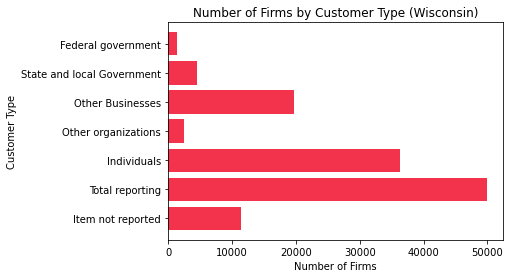

In [8]:
wisconsindf = df[df["NAME"] == "Wisconsin"]
wisconsindf["FIRMPDEMP"] = pd.to_numeric(wisconsindf["FIRMPDEMP"],errors="coerce")
wisconsindf = wisconsindf.loc[(wisconsindf["BUSCHAR_LABEL"] != "All firms")]
wisconsindf = wisconsindf.replace("State and local government, including school districts, transportation authorities, etc.","State and local Government")
wisconsindf = wisconsindf.replace("Other businesses, including distributors of your product(s)","Other Businesses")

field="BUSCHAR_LABEL"
typeOrder=["Item not reported","Total reporting","Individuals","Other organizations","Other Businesses","State and local Government","Federal government"]
wisconsindf = wisconsindf.set_index(field).loc[typeOrder]

plt.barh(wisconsindf.index,wisconsindf["FIRMPDEMP"],color="#F3334B")
plt.title("Number of Firms by Customer Type (Wisconsin)")
plt.xlabel("Number of Firms")
plt.ylabel("Customer Type")
plt.show()

Extraction Steps for nationwide data:

1.Make sure you have the required imports for extraction: requests,json,pandas

2.Connect to the API using the url provided and the requests.request("GET",YOURURL) method: 
    url = https://api.census.gov/data/2018/abscb.html?get=NAME,QDESC,BUSCHAR,QDESC_LABEL,BUSCHAR_LABEL,FIRMPDEMP,FIRMPDEMP_F&for=us:*&QDESC=B14&key=YOURKEY
    
    *NOTE* Make sure to request a key and replace YOURKEY in the above url with the key you received *NOTE*
    
    *NOTE* The only difference between this url and the url required for the state data is in the "for=" section of the url. Replace state with us. *NOTE*

3.Load in the request response as a JSON using the json.loads(response.text) method

4.Save the first entry from the JSON as your labels, this sets up the columns in the dataframe

5.Save the remaining entries from the JSON as your rows, this sets up the data in the dataframe

6.Create the dataframe using the pandas.DataFrame(rows,columns=labels) method

In [9]:
import seaborn as sns

url = "https://api.census.gov/data/2018/abscb.html?get=NAME,QDESC,BUSCHAR,QDESC_LABEL,BUSCHAR_LABEL,FIRMPDEMP,FIRMPDEMP_F&for=us:*&QDESC=B14&key=1b20acce6b62709834dab0bc6006364236b68266"

response = requests.request("GET",url)

responseJSON = json.loads(response.text)

data_labels = responseJSON[0]

data_rows = responseJSON[1:]

df = pd.DataFrame(data_rows,columns=data_labels)



Transformation steps for nationwide data:

1.Change the FIRMDEMP data to be numeric data using the pandas.to_numeric(variable) method

    *NOTE* You may have to include the errors="coerce" parameter in order to make this work *NOTE*

*NOTE* These next steps are optional and just make for more consistent data and increase readability *NOTE*

2.Replace the label "State and local government, including school districts, transportation authorities, etc." with "State and local Government" using the replace("oldLabel","newLabel") method
    to increase readability

3.Replace the label "Other businesses, including distributors of your product(s)" with "Other Businesses" using the replace("oldLabel","newLabel") method to increase readability

Included in the codeblock below are the steps to generate a graph using the seaborn package. If you wish to replicate these steps make sure you have installed and imported the seaborn
    package *NOTE*
 

[Text(0.5, 1.0, 'Number of Firms by Customer Type (United States)'),
 Text(0.5, 0, 'Number of Firms'),
 Text(0, 0.5, 'Customer Type')]

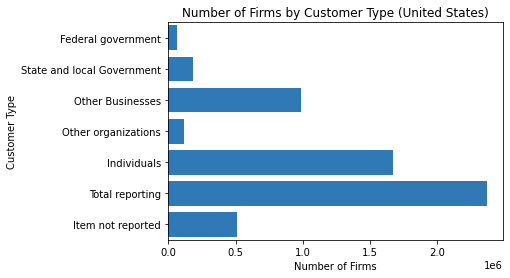

In [10]:
df["FIRMPDEMP"] = pd.to_numeric(df["FIRMPDEMP"],errors="coerce")
df.drop([0],inplace=True,axis=0)
df = df.replace("State and local government, including school districts, transportation authorities, etc.","State and local Government")
df = df.replace("Other businesses, including distributors of your product(s)","Other Businesses")

axus = sns.barplot(x="FIRMPDEMP",y="BUSCHAR_LABEL",data=df,color="#187BCD")

axus.set(title="Number of Firms by Customer Type (United States)",xlabel="Number of Firms",ylabel="Customer Type")